In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


fontsize = 13
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Quantifications of LFC from intensity values Western Blot

In [2]:
# Raw intensity measurements from ImageJ

import pandas as pd

# Create a dictionary with the provided data
data = {
    "mem8.3.24_15m3x": ["NC1", "15m1", "NC2", "15m2"],
    "GAPDH": [10272.631, 10991.631, 9607.51, 11698.045],
    "HP1": [8707.66, 7669.882, 4013.054, 5081.782],
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index to the first column
df.set_index("mem8.3.24_15m3x", inplace=True)

# Display the DataFrame
df

,GAPDH,HP1
mem8.3.24_15m3x,,
NC1,10272.631,8707.660
15m1,10991.631,7669.882
NC2,9607.510,4013.054
15m2,11698.045,5081.782


In [3]:
NC_GAPDH = df.loc[["NC1", "NC2"], "GAPDH"]
C_GAPDH = df.loc[["15m1", "15m2"], "GAPDH"]

# Calculate the average
NC_avg_gapdh = NC_GAPDH.mean()
C_avg_gapdh = C_GAPDH.mean()

print("Average of GAPDH for NC1 and NC2:", NC_avg_gapdh)
print("Average of GAPDH for 15m1 and 15m2:", C_avg_gapdh)

Average of GAPDH for NC1 and NC2: 9940.0705
Average of GAPDH for 15m1 and 15m2: 11344.838


In [4]:
# Controls HP1a normalized

ratio_C_NC = C_avg_gapdh / NC_avg_gapdh
print("The ratio between Conf and NC:", ratio_C_NC)

NC1_hp1a = df.loc["NC1", "HP1"]
NC1_normalized = NC1_hp1a * ratio_C_NC
print("NC1 normalized:", NC1_normalized)

NC2_hp1a = df.loc["NC2", "HP1"]
NC2_normalized = NC2_hp1a * ratio_C_NC
print("NC2 normalized:", NC2_normalized)

# Confined 15m HP1a normalized

ratio_NC_C = NC_avg_gapdh / C_avg_gapdh
print("The ratio between NC and Conf:", ratio_NC_C)

C1_hp1a = df.loc["15m1", "HP1"]
C1_normalized = C1_hp1a * ratio_NC_C
print("Conf 15m1 normalized:", C1_normalized)

C2_hp1a = df.loc["15m2", "HP1"]
C2_normalized = C2_hp1a * ratio_NC_C
print("Conf 15m2 normalized:", C2_normalized)

The ratio between Conf and NC: 1.1413236958430024
NC1 normalized: 9938.258693344278
NC2 normalized: 4580.193622897545
The ratio between NC and Conf: 0.8761756227810392
Conf 15m1 normalized: 6720.163638007082
Conf 15m2 normalized: 4452.533508687475


In [5]:
# Fold change from NC to 15min confinement, first run
# Fold change calculation
fold_change_15m1 = C1_normalized / NC1_normalized
fold_change_15m2 = C2_normalized / NC2_normalized

print("Fold change for 15m1 normalized by NC1 normalized:", fold_change_15m1)
print("Fold change for 15m2 normalized by NC2 normalized:", fold_change_15m2)

# As we keep the control as 1 and normalize HP1a by the control, we get relative expression levels to the control.

avg_FC = (fold_change_15m1 + fold_change_15m2) / 2
print("Avg. FC:", avg_FC)

Fold change for 15m1 normalized by NC1 normalized: 0.6761912569761968
Fold change for 15m2 normalized by NC2 normalized: 0.972127790936203
Avg. FC: 0.8241595239561998


In [13]:
# Fold change values
fold_changes = np.array([fold_change_15m1, fold_change_15m2])

# Calculate standard deviation
std_dev = np.std(fold_changes)

print("Standard deviation for fold change:", std_dev)

# For using standard deviation from population and not based on sample from Excel. Recommended to use population when there is a duplicate.

Standard deviation for fold change: 0.14796826698000315


### Bar plot of NC and Conf with std

In [14]:
# Create a DataFrame for bar plot
FC = {"Condition": ["Non-Confined", "Confined"], "Fold Change": [1, avg_FC], "sd": [0, std_dev]}

barplot_df = pd.DataFrame(FC)

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_44270/1192130013.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(new_confiner_labels_IMR90)


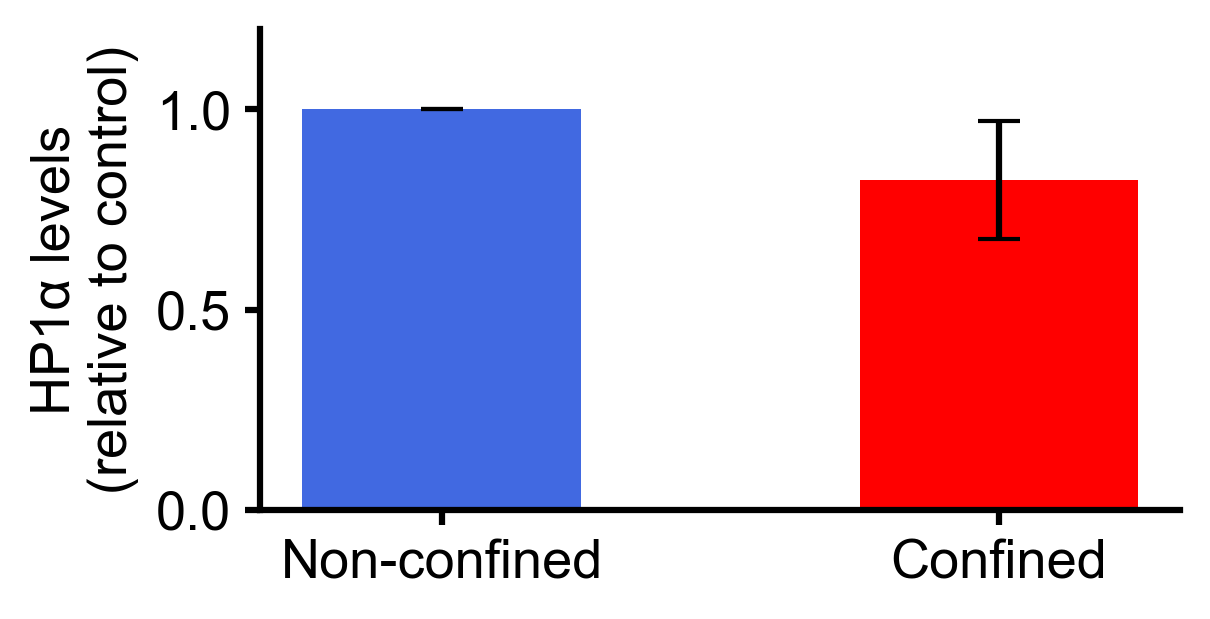

In [16]:
# Specify width and height in millimeters
fig_width_mm = 105
fig_height_mm = 55

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=False
)

labels = ["Non-Confined", "Confined"]
colors = ["royalblue", "red"]

bar_width = 0.5

barplot = axes.bar(
    barplot_df["Condition"], barplot_df["Fold Change"], yerr=barplot_df["sd"], color=colors, capsize=5, width=bar_width
)

plt.xlabel(None)


axes.set(ylabel="HP1α levels\n(relative to control)")
axes.set_ylim(0, 1.2)

lw = 1.5

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes.spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes.tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

new_confiner_labels_IMR90 = ["Non-confined", "Confined"]

axes.set_xticklabels(new_confiner_labels_IMR90)

plt.savefig("../../Figures/Supplementary/Suppl_Figure4E.pdf", bbox_inches="tight", dpi=300)

plt.show()